<a href="https://colab.research.google.com/github/LBIVeterinary/SBG2024/blob/main/Colab_SBG2024_FFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GENÔMICA BACTERIANA
Profa. Dra. Flávia Aburjaile

##Linguagens do Colab

A plataforma virtual do Colab aceita e trabalha com duas linguagens, IPython e Bash. Todavia, de forma nativa a plataforma prioriza o uso de Python. Para forçar o uso de Shell basta adicionar um sinal de exclamação (!) antes da linha de código.

In [ ]:
#Python
print("Este é um comando em python!!!")

In [ ]:
#Bash
!echo "Este é um comando em bash!!!"

##Download de programas e dependências

Para as funcionalidades de genômica comparativa apresentadadas nesse notebook, utilizaremos os seguintes programas:

FastQC https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

QUAST https://doi.org/10.1093/bioinformatics/btt086

PROKKA https://doi.org/10.1093/bioinformatics/btu153

pyANI https://doi.org/10.1039/C5AY02550H

Pan Virulence and resisTance analysis (PanViTa) https://doi.org/10.3389/fbinf.2023.1070406

In [ ]:
#Tempo de execução (aprox.) = 18 seg
!pip install ipykernel
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#Tempo de execução (aprox.) = 8 min
!conda install conda-forge::mamba -y
!mamba install -c bioconda multiqc -y
!mamba install -c bioconda fastqc -y
!mamba install -c bioconda quast -y
!mamba install -c bioconda adapterremoval -y
!mamba install -c bioconda spades -y
!mamba install -c bioconda prokka -y
!mamba install -c bioconda pyani -y
!mamba install -c conda-forge datasets -y
!wget https://raw.githubusercontent.com/dlnrodrigues/panvita/master/panvita.py
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install wget
!pip install basemap
!chmod 777 panvita.py
!./panvita.py -u

##Obtenção de leituras

Arquivos que contem sequências biológicas podem ser obtidos de diferentes formas e em diferentes formatos.
É sempre importante se atentar à qual o formato de arquivo para *input* de uma ferramenta, para não cometer o erro de obter o formato errado.

Existem algumas ferramentas capazes de automatizar o download e a obtenção de sequências biológicas. Uma das mais utilizadas recentemente é o pipeline NCBI Datasets.

Para o curso de hoje, vamos inicialmente obter arquivos contendo as leituras brutas de sequênciamentos depositados no banco de dados ENA (https://www.ebi.ac.uk/ena/browser/home). Posteriormente trabalharemos com montagens de genomas depositadas e disponíveis através do NCBI (https://www.ncbi.nlm.nih.gov/datasets/genome/).

In [ ]:
#Tempo de execução (aprox.) = 1 min
!mkdir Reads

#Reads 01 SRR3924583/K27
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/006/SRR3924596/SRR3924596_1.fastq.gz -O Reads/Mpneumoniae_K27_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/006/SRR3924596/SRR3924596_2.fastq.gz -O Reads/Mpneumoniae_K27_2.fastq.gz

#Reads 02 SRR3924584/FL1
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/003/SRR3924593/SRR3924593_1.fastq.gz -O Reads/Mpneumoniae_FL1_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/003/SRR3924593/SRR3924593_2.fastq.gz -O Reads/Mpneumoniae_FL1_2.fastq.gz

#Reads 03 SRR3924585/M129_2002
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924635/SRR3924635_1.fastq.gz -O Reads/Mpneumoniae_M129_2002_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924635/SRR3924635_2.fastq.gz -O Reads/Mpneumoniae_M129_2002_2.fastq.gz

#Reads 04 SRR3924586/FL8
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924587/SRR3924587_1.fastq.gz -O Reads/Mpneumoniae_FL8_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924587/SRR3924587_2.fastq.gz -O Reads/Mpneumoniae_FL8_2.fastq.gz

#Reads 05 SRR3924587/E16
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/001/SRR3924591/SRR3924591_1.fastq.gz -O Reads/Mpneumoniae_E16_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/001/SRR3924591/SRR3924591_2.fastq.gz -O Reads/Mpneumoniae_E16_2.fastq.gz

In [ ]:
#Tempo de execução (aprox.) = 50 seg
!cp Reads/Mpneumoniae_M129_2002_1.fastq.gz Reads/Mpneumoniae_M129_2002_1_raw.fastq.gz
!gunzip Reads/Mpneumoniae_M129_2002_1_raw.fastq.gz
!head -20 Reads/Mpneumoniae_M129_2002_1_raw.fastq

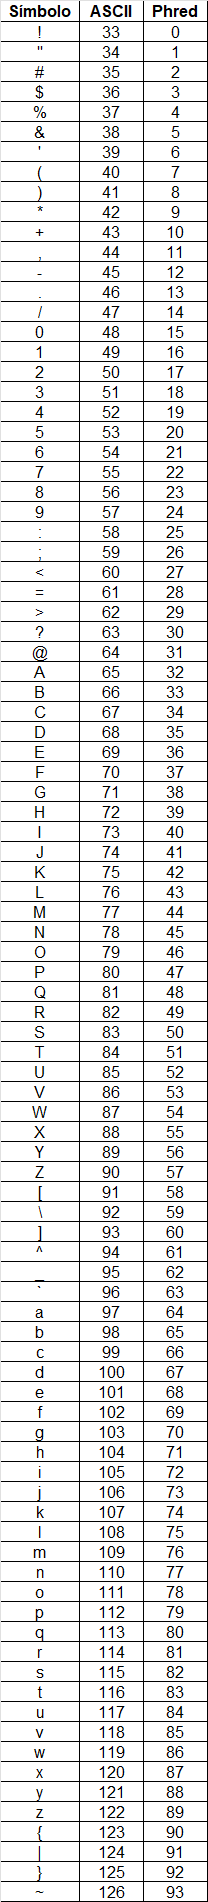

##Análise de qualidade do sequenciamento

Um arquivo FASTQ contem as leituras de um sequênciamento. A qualidade de cada sequenciamento deve ser avaliada com base em diferentes fatores.

Um dos principais programas para análise de qualidade de leituras é o FastQC.

In [ ]:
#Tempo de execução (aprox.) = 4 min
!fastqc /content/Reads/*.fastq.gz
!multiqc /content/Reads

##Trimagem

A trimagem de sequências é um elemento chave na montagem de genomas, pois envolve a remoção de bases de baixa qualidade, adaptadores e contaminantes das sequências brutas antes da montagem. Esse processo é fundamental para garantir que a montagem seja precisa e livre de erros que possam ser introduzidos por sequências de má qualidade. Isso, por sua vez, aumenta a acurácia da montagem final, facilitando análises posteriores, como a anotação genômica.

In [ ]:
#Tempo de execução (aprox.) = 1 min
!AdapterRemoval --file1 /content/Reads/Mpneumoniae_M129_2002_1.fastq.gz \
--file2 /content/Reads/Mpneumoniae_M129_2002_2.fastq.gz \
--threads 10 \
--basename Mpneumoniae_M129_2002_trimmed \
--trimns \
--trimqualities \
--minquality 30 \
--minlength 50 \
--collapse

In [ ]:
#Tempo de execução (aprox.) = 1 min
!mv Mpneumoniae_M129_2002_trimmed.pair1.truncated Mpneumoniae_M129_2002_trimmed.pair1.fastq
!mv Mpneumoniae_M129_2002_trimmed.pair2.truncated Mpneumoniae_M129_2002_trimmed.pair2.fastq
!fastqc /content/Mpneumoniae_M129_2002_trimmed.pair1.fastq
!fastqc /content/Mpneumoniae_M129_2002_trimmed.pair2.fastq

##Montagem

In [ ]:
#Tempo de execução (aprox.) = 0 seg
!spades.py

In [ ]:
#Tempo de execução (aprox.) = 60 min
#!spades.py -1 /content/Mpneumoniae_M129_2002_trimmed.pair1.fastq -2 /content/Mpneumoniae_M129_2002_trimmed.pair2.fastq -o /content/Mpneumoniae_M129_2002_assembly -t 10 --isolate

##Qualidade da montagem

O programa Quality Assessment Tool for Genome Assemblies (QUAST) é um dos mais utilizados para a análise da qualidade de montagens genômicas. Ele permite a avaliação de diversos critérios, como: número de contigs, o tamanho do maior contig, o N50 e o L50. O QUAST também oferece informações sobre regiões de discrepâncias em relação ao genoma de referência (caso seja fornecido).

Além disso, o QUAST gera relatórios visuais e estatísticos que facilitam a interpretação dos resultados, permitindo identificar possíveis problemas, como montagens fragmentadas ou regiões mal cobertas. Esses relatórios são fundamentais para orientar melhorias no processo de montagem, como a escolha de parâmetros mais adequados ou a inclusão de dados adicionais para cobrir regiões críticas.

In [ ]:
#Tempo de execução (aprox.) = 5 seg
!wget --no-check-certificate https://raw.githubusercontent.com/LBIVeterinary/SBG2024/main/Genomes.zip -O "Genomes.zip"
!unzip -o Genomes.zip
!rm Genomes.zip

In [ ]:
#Tempo de execução (aprox.) = 25 seg
!quast -o Quast_mycoplasmoides -t 10 Genomes/*.fna

##Anotando um genoma utilizando PROKKA

Em um arquivo FASTA (fna), a informação da sequência biológica raramente é inteligivel para olhos humanos não treinados.

Isso acontece pois o arquivo contem toda a informação disponibilizada por um genoma (ou proteoma), porém, essa informação ainda não foi descrita de forma à determinar informações de sentido biológica.

Ao ato de dar um sentido e significado à uma sequência biológica é dado o nome de anotação.

Ao anotar um genoma, espera-se determinar a estrutura de genes e outros compostos genômicos (anotação estrutural). Além disso, também espera-se obter informações quanto à função putativa de cada gene e fragmento não transcricional (anotação funcional).

Existem alguns programas capazes de realizar os processos de anotação de genomas bacterianos. Um dos mais utilizados é o pipeline PROKKA.

In [ ]:
#Tempo de execução (aprox.) = 0 seg
!prokka -h

In [ ]:
#Tempo de execução (aprox.) = 3 min
!prokka Genomes/Mpneumoniae_M129_2002.fna --outdir Mpneumoniae_M129_2002 --prefix Mp_M129_2002 --locustag Mp_M129_2002 --cpus 10 --force --genus Mycoplasmoides --species pneumoniae --strain M129_2002

In [ ]:
#Tempo de execução (aprox.) = 1 seg
!head -32 Mpneumoniae_M129_2002/Mp_M129_2002.gbk

##Avaliando Identidade Média de Nucleotídeos

Diferentes organismos possuem diferentes caracteristicas intrinsecas. Isso está relacionado às diversas formas e conteúdos presentes em um genoma. São milhares de bases de se ordenam de formas incontáveis.

De modo geral, essas diferenças genômicas entre linhagens relacionadas estão ligadas à genes linhagem específicos, inespecificidades da montagem, deleções, insersões, entre outros fatores.

Uma análise capaz de quantificar a similaridade entre dois genomas, é a chamada Average of Nucleotide Identity (ANI), ou Identidade Média de Nucleotídeos.

De forma geral, durante a análise por ANI os genomas (A e B) são inicialmente fragmentados *in silico*. Cada fragmento de A é então alinhado contra todos os possíveis fragmentos de B. Ao final, o identidade média de nucleotídeos entre A e B é a média dos valores de identidade dos alinhamentos entre os fragmentos feitos.

Conceitualmente, um ANI superior à 95-96% indica que ambos os genomas pertencem à uma mesma espécie bacteriana.

In [ ]:
#Tempo de execução (aprox.) = 5 seg
!average_nucleotide_identity.py -h

In [ ]:
#Tempo de execução (aprox.) = 1 min
!average_nucleotide_identity.py -i Genomes -o TETRA_Mycoplasmoides -m TETRA -g --gmethod seaborn -f

In [ ]:
#Tempo de execução (aprox.) = 17 min
!average_nucleotide_identity.py -i Genomes -o ANI_Mycoplasmoides -m ANIm -g --gmethod seaborn -f

##Análise de resistência e virulência

No ambiente, diversos microrganismos precisam se adaptar à condições adversas. Seja pela toxicidade à elementos naturais, seja pela ação de antimicrobianos, bactérias estão sob constante pressão.

Hoje em dia, existem bancos de dados que contem a informação desses genes capazes de lidar com a pressão envolvendo substâncias exógenas.

**CARD** - Comprehensive Antibiotic Resistance Database <https://card.mcmaster.ca>

**BacMet** - Antibacterial Biocide and Metal Resistance Genes Database <http://bacmet.biomedicine.gu.se>

Por outro lado, um mecanismo de virulência é qualquer mecanismo que possibilite que um organismo infecte o hospedeiro, cause uma doença e sobreviva à nível celular.

**VFDB** - Virulence Factor Database <http://www.mgc.ac.cn/VFs/>

In [ ]:
#Tempo de execução (aprox.) = 4 min
!prokka Genomes/Malvi_ATCC_29626.fna.fna --outdir Malvi_ATCC_29626 --prefix Ma_ATCC_29626 --locustag Ma_ATCC_29626 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_14-637.fna --outdir Mpneumoniae_14-637 --prefix Mp_14-637 --locustag Mp_14-637 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_16-734.fna --outdir Mpneumoniae_16-734 --prefix Mp_16-734 --locustag Mp_16-734 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_519.fna --outdir Mpneumoniae_519 --prefix Mp_519 --locustag Mp_519 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_630.fna --outdir Mpneumoniae_630 --prefix Mp_630 --locustag Mp_630 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_CO3.fna --outdir Mpneumoniae_CO3 --prefix Mp_CO3 --locustag Mp_CO3 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_E57.fna --outdir Mpneumoniae_E57 --prefix Mp_E57 --locustag Mp_E57 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_FH.fna --outdir Mpneumoniae_FH --prefix Mp_FH --locustag Mp_FH --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_FH_2009.fna --outdir Mpneumoniae_FH_2009 --prefix Mp_FH_2009 --locustag Mp_FH_2009 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_KCH-120.fna --outdir Mpneumoniae_KCH-120 --prefix Mp_KCH-120 --locustag Mp_KCH-120 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_M129_2002.fna --outdir Mpneumoniae_M129_2002 --prefix Mp_M129_2002 --locustag Mp_M129_2002 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_NCTC10119.fna --outdir Mpneumoniae_NCTC10119 --prefix Mp_NCTC10119 --locustag Mp_NCTC10119 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_OA-63.fna --outdir Mpneumoniae_OA-63 --prefix Mp_OA-63 --locustag Mp_OA-63 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_RI3.fna --outdir Mpneumoniae_RI3 --prefix Mp_RI3 --locustag Mp_RI3 --cpus 10 --force --fast --noanno
!prokka Genomes/Mpneumoniae_Y12-4.fna --outdir Mpneumoniae_Y12-4 --prefix Mp_Y12-4 --locustag Mp_Y12-4 --cpus 10 --force --fast --noanno

In [ ]:
#Tempo de execução (aprox.) = 2 seg
!./panvita.py -h

In [ ]:
#Tempo de execução (aprox.) = 2 min
!./panvita.py -vfdb **/*.gbk -png

##Desafio

Faça o download de 12 genomas no site https://www.ncbi.nlm.nih.gov/datasets/genome/ e realize a análise de identidade média de nucleotídeos e encontre o perfil de genes de virulência da amostra.